In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

img_height, img_width = 28, 28
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 8389 images belonging to 63 classes.
Found 1444 images belonging to 63 classes.
Number of classes (letters): 63


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 63)             │        32,319 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,039 (746.25 KB)

 Trainable params: 191,039 (746.25 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.0861 - loss: 3.5928 - val_accuracy: 0.3643 - val_loss: 1.7430
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.4116 - loss: 1.5965 - val_accuracy: 0.5222 - val_loss: 1.2203
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5276 - loss: 1.1779 - val_accuracy: 0.5623 - val_loss: 1.0770
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5920 - loss: 0.9897 - val_accuracy: 0.5990 - val_loss: 0.9663
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6371 - loss: 0.8759 - val_accuracy: 0.6046 - val_loss: 0.9523
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6744 - loss: 0.7911 - val_accuracy: 0.6198 - val_loss: 0.8952
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6956 - loss: 0.7270 - val_accuracy: 0.6434 - val_loss: 0.8363
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7125 - loss: 0.6815 - val_accu

In [40]:
model.save('letter_recognizer_model.keras')

In [41]:
from tensorflow.keras.preprocessing import image

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted Letter: bo_bu


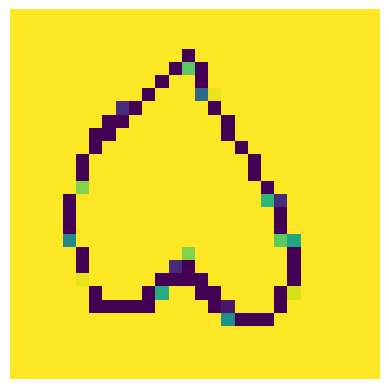

In [42]:
plt.imshow(img)
plt.axis('off')
plt.show()